In [19]:
# Importing libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [20]:
# Reading the dataset
df=pd.read_csv("Advertising.csv")
df=df.drop('Unnamed: 0', axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [21]:
#checking datatypes and values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
#Checking entries and colimn number
df.shape

(200, 4)

In [23]:
#Checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [24]:
# Displaying General stats
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [25]:
# Printing columns
df.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

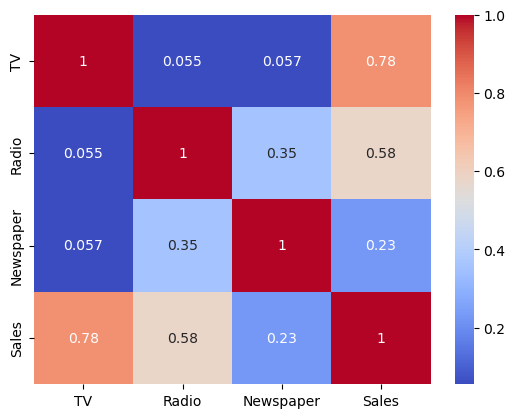

In [26]:
# Calculate the correlation matrix between all columns
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### According to heatmap, The top highly Correlated attributes are:
1. TV
2. Radio
3. Newspaper

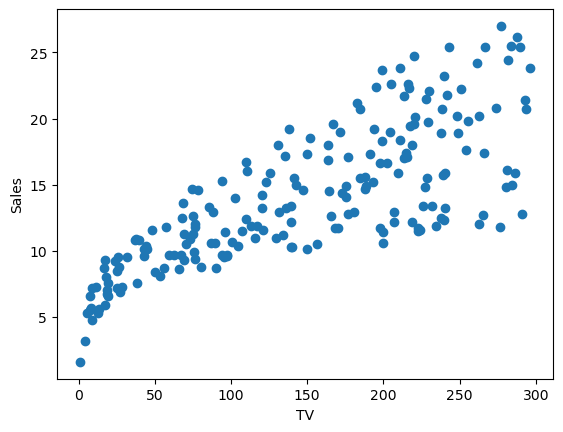

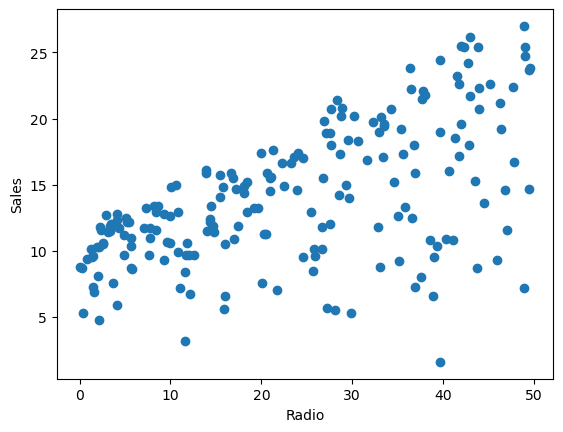

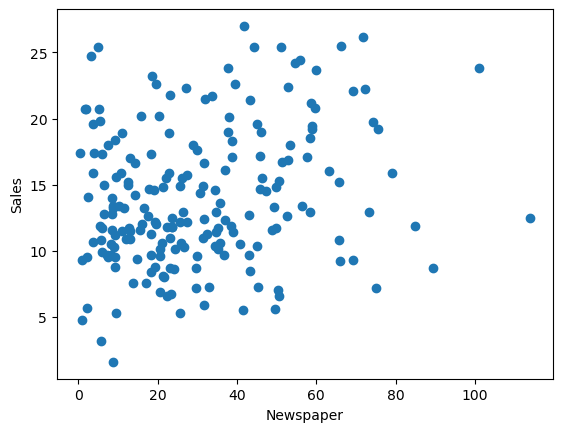

In [27]:
# Create a line chart of each column with 'Sales'
for col in df.columns:
    if col != 'Sales':
        plt.plot(df[col], df['Sales'], 'o')
        plt.xlabel(col)
        plt.ylabel('Sales')
        plt.show()

In [28]:
import numpy as np
# Drop any additional columns besides 'TV', 'Radio', 'Newspaper', and 'Sales'
df = df[['TV', 'Radio', 'Newspaper', 'Sales']]

In [29]:
# Add polynomial terms for 'TV' and 'Radio'
df['TV_sq'] = df['TV']**2
df['Radio_sq'] = df['Radio']**2

# Add interaction term for 'TV' and 'Radio'
df['TV_Radio'] = df['TV'] * df['Radio']

# Create the feature matrix with the original features, polynomial terms, and interaction terms
X = df[['TV', 'Radio', 'Newspaper', 'TV_sq', 'Radio_sq', 'TV_Radio']]

In [30]:
# Create the y dataframe with the sales data
y = df[['Sales']].values


In [31]:
# Split the data into training and testing sets
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
# Fit a linear regression model with the interaction and polynomial terms as features
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Evaluate the performance of the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.3694112644010054


In [34]:
from sklearn.preprocessing import StandardScaler

# Define the scaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper','TV_sq', 'Radio_sq', 'TV_Radio']])

# Use the scaled data to fit the model and make predictions
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['Sales'], test_size=0.3, random_state=42)

# create new data to predict on
new_data = [[100, 50, 25, 10000, 2500, 625]] # TV = 100, Radio = 50, Newspaper = 25

# apply the same scaler used on the training data
new_data_scaled = scaler.transform(new_data)

# pass the preprocessed new data to the model for prediction
y_pred = model.predict(new_data_scaled)

print("Predicted Sales: ", y_pred[0])

Predicted Sales:  4.8655388622811255


/Users/chinmayakumarpalo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/chinmayakumarpalo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
